In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
#using profiler
import pandas_profiling as pf

# Exploratory Analysis
* getting an intuitive view of our dataset

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_test = pd.read_csv('test.csv')

In [4]:
df_train.shape,df_test.shape

((59381, 128), (19765, 127))

In [5]:
df_train.head(10)

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   
5  10               1             D2              26        0.230769   
6  11               1             A8              10        0.166194   
7  14               1             D2              26        0.076923   
8  15               1             D3              26        0.230769   
9  16               1             E1              21        0.076923   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  ...   
4               2               3               1  0.417910  0.654545  ...   
5               3               1               1  0.507463  0.836364  ...   
6               2               3               1  0.373134  0.581818  ...   
7               2               3               1  0.611940  0.781818  ...   
8               2               3               1  0.522388  0.618182  ...   
9               2               3               1  0.552239  0.600000  ...   

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   
5                   0                   0                   0   
6                   0                   0                   0   
7                   0                   0                   0   
8                   0                   0                   0   
9                   0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   
5                   0                   0                   0   
6                   0                   0                   0   
7                   0                   0                   0   
8                   0                   0                   0   
9                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         8  
1                   0                   0                   0         4  
2                   0                   0                   0         8  
3                   0                   0                   0         8  
4                   0                   0                   0         8  
5                   0                   0                   0         8  
6                   0                   0                   0         8  
7                   0                   0                   0         1  
8                   0                   0                   0         8  
9                   0                   0                   0         1  

[10 rows x 128 columns]

In [6]:
df_train.tail()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
59376  79142               1             D1              10        0.230769   
59377  79143               1             D3              26        0.230769   
59378  79144               1             E1              26        0.076923   
59379  79145               1             D2              10        0.230769   
59380  79146               1             A8              26        0.076923   

       Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
59376               2               3               1  0.074627  0.709091   
59377               2               3               1  0.432836  0.800000   
59378               2               3               1  0.104478  0.745455   
59379               2               3               1  0.507463  0.690909   
59380               2               3               1  0.447761  0.781818   

       ...  Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
59376  ...                   0                   0                   0   
59377  ...                   0                   0                   0   
59378  ...                   0                   0                   0   
59379  ...                   1                   0                   0   
59380  ...                   0                   0                   0   

       Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
59376                   0                   0                   0   
59377                   0                   0                   0   
59378                   0                   0                   0   
59379                   0                   0                   0   
59380                   0                   0                   0   

       Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
59376                   0                   0                   0         4  
59377                   0                   0                   0         7  
59378                   0                   0                   0         8  
59379                   0                   0                   0         8  
59380                   0                   0                   0         7  

[5 rows x 128 columns]

In [7]:
df_test.head(10)

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   1               1             D3              26        0.487179   
1   3               1             A2              26        0.076923   
2   4               1             D3              26        0.144667   
3   9               1             A1              26        0.151709   
4  12               1             A1              26        0.076923   
5  13               1             D3              26        0.230769   
6  21               1             A3              26        1.000000   
7  28               1             D4              26        0.256410   
8  30               1             D3              26        0.076923   
9  36               1             A3              26        0.076923   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               3               1  0.611940  0.781818  ...   
1               2               3               1  0.626866  0.727273  ...   
2               2               3               1  0.582090  0.709091  ...   
3               2               1               1  0.522388  0.654545  ...   
4               2               3               1  0.298507  0.672727  ...   
5               2               3               1  0.567164  0.818182  ...   
6               2               3               1  0.298507  0.690909  ...   
7               2               3               1  0.059701  0.654545  ...   
8               2               3               1  0.611940  0.618182  ...   
9               2               3               1  0.328358  0.781818  ...   

   Medical_Keyword_39  Medical_Keyword_40  Medical_Keyword_41  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   
5                   0                   0                   0   
6                   0                   0                   0   
7                   0                   0                   0   
8                   0                   0                   0   
9                   0                   0                   0   

   Medical_Keyword_42  Medical_Keyword_43  Medical_Keyword_44  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   
5                   0                   0                   0   
6                   0                   0                   0   
7                   0                   0                   0   
8                   0                   0                   0   
9                   0                   0                   0   

   Medical_Keyword_45  Medical_Keyword_46  Medical_Keyword_47  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   1   
4                   0                   0                   0   
5                   0                   0                   0   
6                   0                   0                   0   
7                   0                   0                   0   
8                   0                   0                   0   
9                   0                   0                   0   

   Medical_Keyword_48  
0                   0  
1                   0  
2                   0  
3                   1  
4                   0  
5                   0  
6                   0  
7          

In [8]:
df_test.describe()

Id  Product_Info_1  Product_Info_3  Product_Info_4  \
count  19765.000000    19765.000000    19765.000000    19765.000000   
mean   39772.653883        1.024994       24.321730        0.324381   
std    22942.157493        0.156110        5.184879        0.279439   
min        1.000000        1.000000        2.000000        0.000000   
25%    19792.000000        1.000000       26.000000        0.076923   
50%    39898.000000        1.000000       26.000000        0.230769   
75%    59758.000000        1.000000       26.000000        0.487179   
max    79129.000000        2.000000       37.000000        1.000000   

       Product_Info_5  Product_Info_6  Product_Info_7       Ins_Age  \
count    19765.000000    19765.000000    19765.000000  19765.000000   
mean         2.006527        2.655755        1.043410      0.414901   
std          0.080526        0.754993        0.291445      0.200997   
min          2.000000        1.000000        1.000000      0.000000   
25%          2.000000        3.000000        1.000000      0.253731   
50%          2.000000        3.000000        1.000000      0.417910   
75%          2.000000        3.000000        1.000000      0.582090   
max          3.000000        3.000000        3.000000      0.970149   

                 Ht            Wt  ...  Medical_Keyword_39  \
count  19765.000000  19765.000000  ...        19765.000000   
mean       0.705846      0.292557  ...            0.013964   
std        0.074497      0.090343  ...            0.117345   
min        0.345455      0.083682  ...            0.000000   
25%        0.654545      0.225941  ...            0.000000   
50%        0.709091      0.288703  ...            0.000000   
75%        0.763636      0.345188  ...            0.000000   
max        1.000000      0.878661  ...            1.000000   

       Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
count        19765.000000         19765.00000        19765.000000   
mean             0.057324             0.01108            0.045231   
std              0.232466             0.10468            0.207817   
min              0.000000             0.00000            0.000000   
25%              0.000000             0.00000            0.000000   
50%              0.000000             0.00000            0.000000   
75%              0.000000             0.00000            0.000000   
max              1.000000             1.00000            1.000000   

       Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
count        19765.000000        19765.000000        19765.000000   
mean             0.010068            0.008247            0.013559   
std              0.099837            0.090440            0.115655   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  
count        19765.000000        19765.000000        19765.000000  
mean             0.008601            0.018315            0.056312  
std              0.092345            0.134092            0.230528  
min              0.000000            0.000000            0.000000  
25%              0.000000            0.000000            0.000000  
50%              0.000000            0.000000            0.000000  
75%              0.000000            0.000000            0.000000  
max              1.000000            1.000000            1.000000  

[8 rows x 126 columns]

In [7]:
print(df_train['Response'].unique())
print(df_train['Product_Info_1'].unique())
print(df_train['Product_Info_5'].unique())
print(df_train['Product_Info_6'].unique())
print(df_train['Product_Info_7'].unique())


[8 4 1 6 2 7 3 5]
[1 2]
[2 3]
[1 3]
[1 3 2]


In [9]:
df_train.dtypes

Id                       int64
Product_Info_1           int64
Product_Info_2          object
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
                        ...   
Medical_Keyword_20       int64
Medical_

In [10]:
df_train.describe()

Id  Product_Info_1  Product_Info_3  Product_Info_4  \
count  59381.000000    59381.000000    59381.000000    59381.000000   
mean   39507.211515        1.026355       24.415655        0.328952   
std    22815.883089        0.160191        5.072885        0.282562   
min        2.000000        1.000000        1.000000        0.000000   
25%    19780.000000        1.000000       26.000000        0.076923   
50%    39487.000000        1.000000       26.000000        0.230769   
75%    59211.000000        1.000000       26.000000        0.487179   
max    79146.000000        2.000000       38.000000        1.000000   

       Product_Info_5  Product_Info_6  Product_Info_7       Ins_Age  \
count    59381.000000    59381.000000    59381.000000  59381.000000   
mean         2.006955        2.673599        1.043583      0.405567   
std          0.083107        0.739103        0.291949      0.197190   
min          2.000000        1.000000        1.000000      0.000000   
25%          2.000000        3.000000        1.000000      0.238806   
50%          2.000000        3.000000        1.000000      0.402985   
75%          2.000000        3.000000        1.000000      0.567164   
max          3.000000        3.000000        3.000000      1.000000   

                 Ht            Wt  ...  Medical_Keyword_40  \
count  59381.000000  59381.000000  ...        59381.000000   
mean       0.707283      0.292587  ...            0.056954   
std        0.074239      0.089037  ...            0.231757   
min        0.000000      0.000000  ...            0.000000   
25%        0.654545      0.225941  ...            0.000000   
50%        0.709091      0.288703  ...            0.000000   
75%        0.763636      0.345188  ...            0.000000   
max        1.000000      1.000000  ...            1.000000   

       Medical_Keyword_41  Medical_Keyword_42  Medical_Keyword_43  \
count        59381.000000        59381.000000        59381.000000   
mean             0.010054            0.045536            0.010710   
std              0.099764            0.208479            0.102937   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_44  Medical_Keyword_45  Medical_Keyword_46  \
count        59381.000000        59381.000000        59381.000000   
mean             0.007528            0.013691            0.008488   
std              0.086436            0.116207            0.091737   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_47  Medical_Keyword_48      Response  
count        59381.000000        59381.000000  59381.000000  
mean             0.019905            0.054496      5.636837  
std              0.139676            0.226995      2.456833  
min              0.000000            0.000000      1.000000  
25%              0.000000            0.000000      4.000000  
50%              0.000000            0.000000      6.000000  
75%              0.000000            0.000000      8.000000  
max              1.000000            1.000000      8.000000  

[8 rows x 127 columns]

Usinng pandas profiler to get an overview of our dataset

In [11]:
pf.ProfileReport(df_train)


In [13]:
pf.ProfileReport(df_test)

In [14]:
profile = pf.ProfileReport(df_train)

In [15]:
profile_test = pf.ProfileReport(df_test)

In [16]:
profile.to_file(outputfile="output1.html")
profile_test = pf.ProfileReport(outputfile='output_test.html')

TypeError: __init__() missing 1 required positional argument: 'df'

# Doing univarate analysis for categorical features

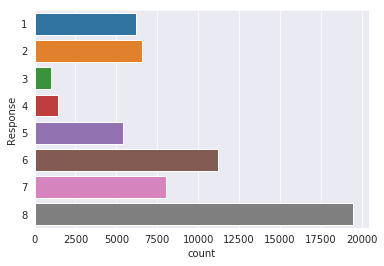

In [10]:
sns.countplot(y='Response',data = df_train)

In [11]:
# Expressing Response in percentage
df_train['Response'].value_counts()/df_train.shape[0]

8    0.328203
6    0.189168
7    0.135178
2    0.110338
1    0.104528
5    0.091477
4    0.024048
3    0.017059
Name: Response, dtype: float64

 from the above stats it shows that 32% of the insurer are classify in risk level.
 with 18% in risk class 6
 and 2% in risk class 2 and 3

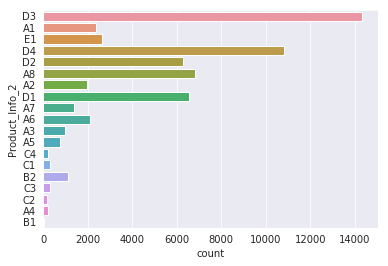

In [13]:
# checking the the distribution of  The Product_Info_2 feature
sns.countplot(y='Product_Info_2',data = df_train)

In [12]:
# expressing the above plot in percentage
df_train['Product_Info_2'].value_counts()/df_train.shape[0]

D3    0.241171
D4    0.182078
A8    0.115104
D1    0.110372
D2    0.105859
E1    0.044577
A1    0.039794
A6    0.035331
A2    0.033243
A7    0.023290
B2    0.018895
A3    0.016453
A5    0.013051
C3    0.005153
C1    0.004800
C4    0.003688
A4    0.003536
C2    0.002694
B1    0.000909
Name: Product_Info_2, dtype: float64

 An important point to know from observing Product_Info_2, less insurers are interested in B1,C2,A4,C4 .this can be seen as sparse class, we will hndle this later.

From the chart above we the presence of sparse class C4,C1,A4 etc, this could cause our model to overfit. this we wiil handle in feature engineering

In [15]:
#filter and display only df_train.dtypes that are object
df_train.dtypes[df_train.dtypes == 'object']

Product_Info_2    object
dtype: object

# Performing Univarate analysis for numerical features
we do this by checking the distribution of the observations in the features

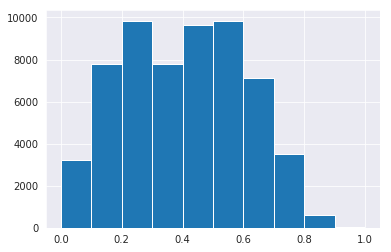

In [13]:
#checking the insurer age distribution
df_train.Ins_Age.hist()

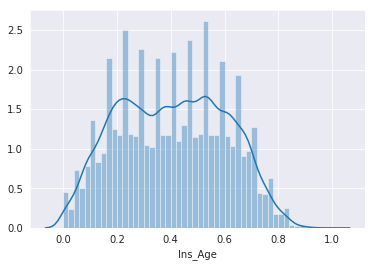

In [14]:
sns.distplot(df_train.Ins_Age)

The insurers Age is normalize, thus require not much work done on it

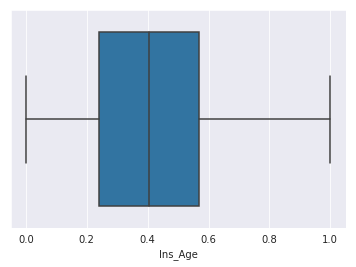

In [15]:
sns.boxplot(df_train.Ins_Age)
plt.show()

their is no presence of outlier

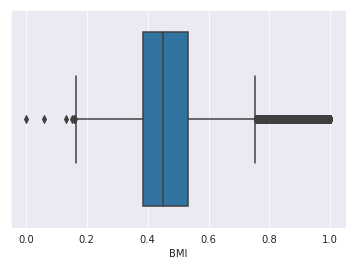

In [16]:
# univarate analysis for BMI
sns.boxplot(df_train.BMI)

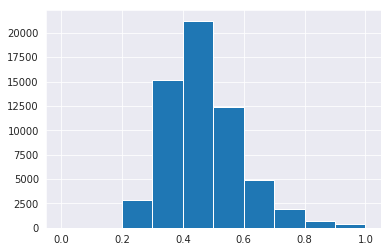

In [17]:
df_train.BMI.hist()

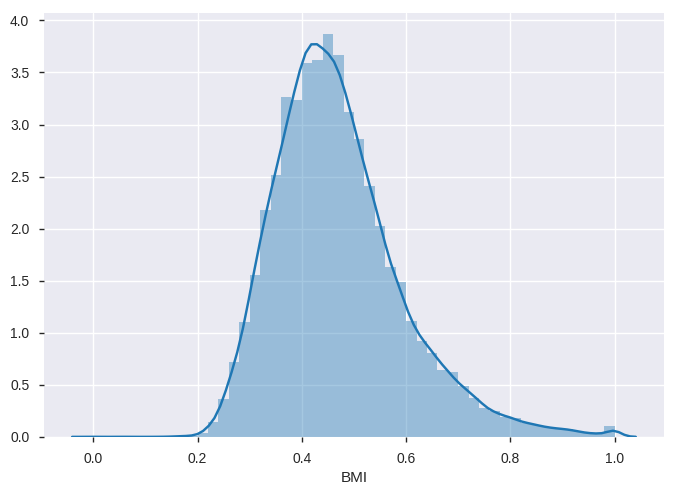

In [24]:
sns.distplot(df_train.BMI)

presence of outlier in BMI features


Performing Bivarate and Multivate analysis
 * the effect of age on the response
 * the effect of the Bmi on the response

from the above figure the Response overlap  with the age distribution 
this showing that 

from the chart above it is seen that more insurer with age range 60 - 80 are classify in response 1


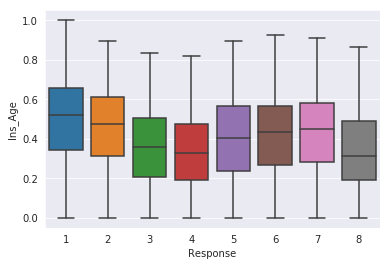

In [18]:
#Ins_age vs Response
sns.boxplot(y='Ins_Age', x='Response', data =df_train)
plt.show()

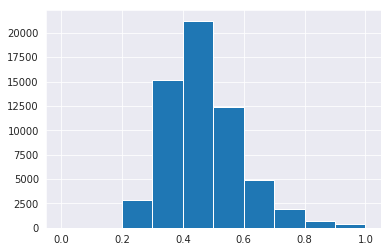

In [19]:
df_train['BMI'].hist()

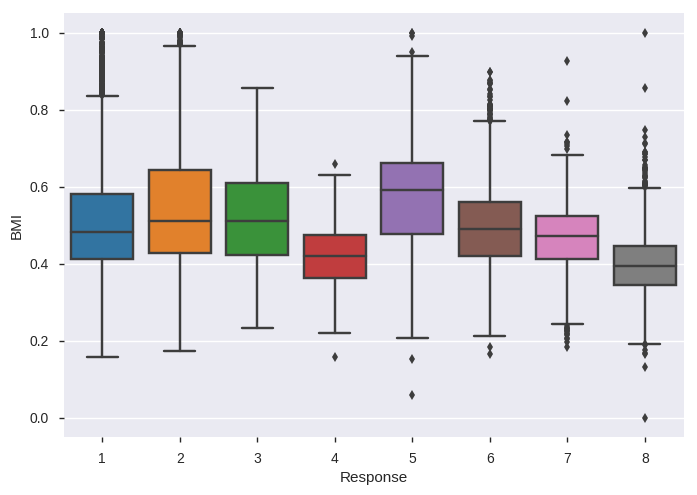

In [27]:
sns.boxplot(y='BMI', x='Response', data =df_train)

plt.show()

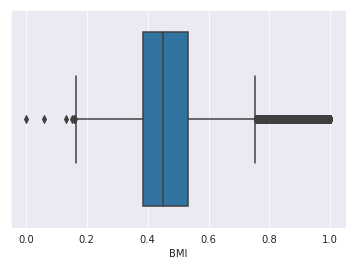

In [20]:
sns.boxplot(df_train.BMI)

In [21]:
df_train['Response'].value_counts(normalize=True)

8    0.328203
6    0.189168
7    0.135178
2    0.110338
1    0.104528
5    0.091477
4    0.024048
3    0.017059
Name: Response, dtype: float64

In [22]:
df_train.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)

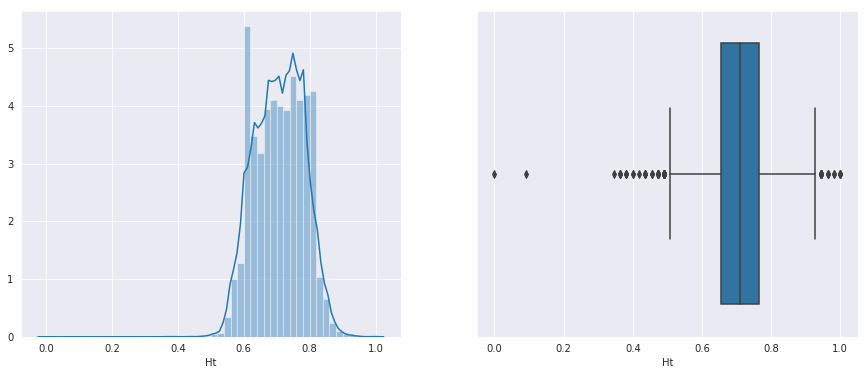

In [24]:
#checking the distribution of the height
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.distplot(df_train['Ht'])
plt.subplot(122)
sns.boxplot(df_train['Ht'])

the height features is fairly normalize and thus okay
however the boxplot reveals to us presence of an outliers, we shall deal with this latter

we can drop the height and weight since we have the bmi

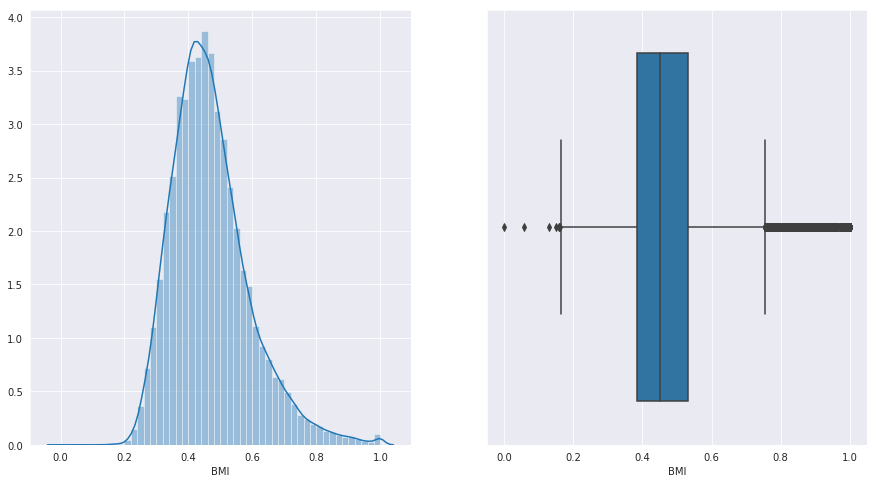

In [25]:

# univarate analysis for BMI
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.distplot(df_train['BMI'])
plt.subplot(122)
sns.boxplot(df_train['BMI'])

the Bmi features is also normalize and thus okay
we also have some outliers as reveal by the boxplot

In [27]:
em=df_train[['Employment_Info_1','Employment_Info_2','Employment_Info_3','Employment_Info_4','Employment_Info_5','Employment_Info_6']]

In [28]:
em.head(20)

Employment_Info_1  Employment_Info_2  Employment_Info_3  \
0              0.0280                 12                  1   
1              0.0000                  1                  3   
2              0.0300                  9                  1   
3              0.0420                  9                  1   
4              0.0270                  9                  1   
5              0.3250                 15                  1   
6              0.1100                  1                  3   
7              0.1200                 12                  1   
8              0.1650                  9                  1   
9              0.0250                  1                  3   
10             0.0500                  9                  1   
11             0.0900                  3                  1   
12             0.0750                  9                  1   
13             0.1000                  9                  1   
14             0.1600                  3                  1   
15             0.0750                  9                  1   
16             0.1000                 14                  1   
17             0.0378                  9                  1   
18             0.0800                  9                  1   
19             0.0550                  9                  1   

    Employment_Info_4  Employment_Info_5  Employment_Info_6  
0                 0.0                  3                NaN  
1                 0.0                  2             0.0018  
2                 0.0                  2             0.0300  
3                 0.0                  3             0.2000  
4                 0.0                  2             0.0500  
5                 0.0                  2             1.0000  
6                 NaN                  3             0.8000  
7                 0.0                  2             1.0000  
8                 0.0                  2             1.0000  
9                 0.0                  3             0.0500  
10                NaN                  2             0.1500  
11                NaN                  2             1.0000  
12                0.0                  2                NaN  
13                NaN                  2             0.0750  
14                0.0                  2             0.6000  
15                0.0                  2                NaN  
16                0.0                  2             0.2500  
17                0.0                  2             0.0360  
18                0.0                  2                NaN  
19                0.0                  2             0.0000

# Data Cleaning

In [28]:
#drop Duplicates
df_train =df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

In [21]:
df_test.isnull().sum()[df_test.isnull().sum() !=0]/df_test.shape[0]

Employment_Info_1      0.000152
Employment_Info_4      0.108120
Employment_Info_6      0.191601
Insurance_History_5    0.410068
Family_Hist_2          0.499874
Family_Hist_3          0.559777
Family_Hist_4          0.337819
Family_Hist_5          0.689299
Medical_History_1      0.150367
Medical_History_10     0.989831
Medical_History_15     0.752036
Medical_History_24     0.940299
Medical_History_32     0.982241
dtype: float64

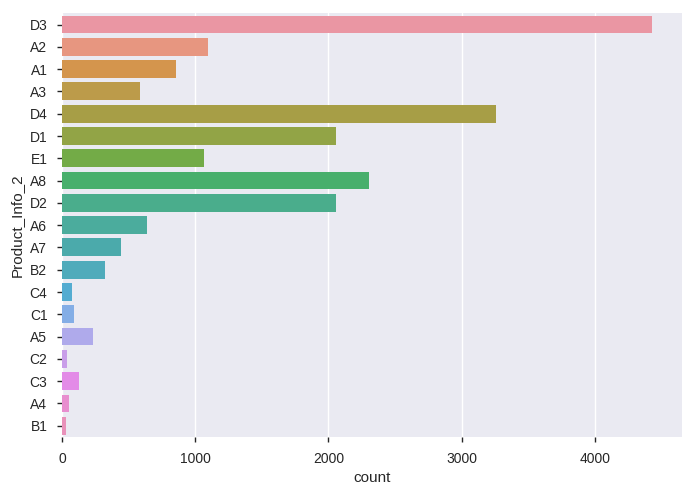

In [29]:
sns.countplot(y='Product_Info_2' , data= df_test)

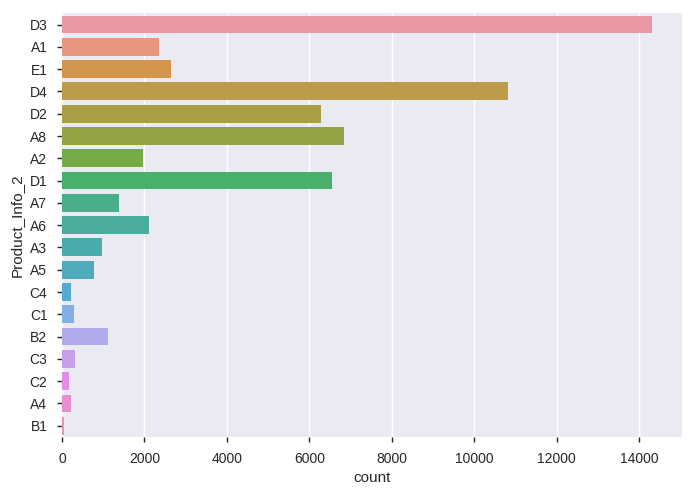

In [30]:
sns.countplot(y='Product_Info_2', data=df_train)

In [31]:
df_train['Product_Info_2'].value_counts()/df_train.shape[0]

D3    0.241171
D4    0.182078
A8    0.115104
D1    0.110372
D2    0.105859
E1    0.044577
A1    0.039794
A6    0.035331
A2    0.033243
A7    0.023290
B2    0.018895
A3    0.016453
A5    0.013051
C3    0.005153
C1    0.004800
C4    0.003688
A4    0.003536
C2    0.002694
B1    0.000909
Name: Product_Info_2, dtype: float64

# finding and counting missing values for categorical feature

In [32]:
df_train.select_dtypes(include=['object']).isnull().sum()

Product_Info_2    0
dtype: int64

from the above the caregorical features do not have any outlier

# checking for missing values in the numerical features

In [33]:
df_train.isnull().sum()[df_train.isnull().sum() !=0]/df_train.shape[0]

Employment_Info_1      0.000320
Employment_Info_4      0.114161
Employment_Info_6      0.182786
Insurance_History_5    0.427679
Family_Hist_2          0.482579
Family_Hist_3          0.576632
Family_Hist_4          0.323066
Family_Hist_5          0.704114
Medical_History_1      0.149694
Medical_History_10     0.990620
Medical_History_15     0.751015
Medical_History_24     0.935990
Medical_History_32     0.981358
dtype: float64

In [34]:
df_test.isnull().sum()[df_test.isnull().sum() !=0]/df_test.shape[0]

Employment_Info_1      0.000152
Employment_Info_4      0.108120
Employment_Info_6      0.191601
Insurance_History_5    0.410068
Family_Hist_2          0.499874
Family_Hist_3          0.559777
Family_Hist_4          0.337819
Family_Hist_5          0.689299
Medical_History_1      0.150367
Medical_History_10     0.989831
Medical_History_15     0.752036
Medical_History_24     0.940299
Medical_History_32     0.982241
dtype: float64

Expressing the missing values in percentage for better understanding

In [35]:
df_train['Medical_History_1'].fillna(df_train['Medical_History_1'].median(),inplace=True)
df_test['Medical_History_1'].fillna(df_test['Medical_History_1'].median(),inplace=True)


In [36]:
df_train.isnull().sum()[df_train.isnull().sum() !=0]/df_train.shape[0]

Employment_Info_1      0.000320
Employment_Info_4      0.114161
Employment_Info_6      0.182786
Insurance_History_5    0.427679
Family_Hist_2          0.482579
Family_Hist_3          0.576632
Family_Hist_4          0.323066
Family_Hist_5          0.704114
Medical_History_10     0.990620
Medical_History_15     0.751015
Medical_History_24     0.935990
Medical_History_32     0.981358
dtype: float64

# Handling missing values
    * perform mode imputation for categorical fatures
    * perform mean or median imputation for numerical features
    * drop features with large missing values

In [37]:
df_train.drop(['Medical_History_32', 'Medical_History_24', 'Medical_History_15', 'Medical_History_10', 'Family_Hist_5', 'Family_Hist_4', 'Family_Hist_3'], axis=1, inplace=True)

In [38]:
df_test.drop(['Medical_History_32', 'Medical_History_24', 'Medical_History_15', 'Medical_History_10', 'Family_Hist_5', 'Family_Hist_4', 'Family_Hist_3'], axis=1, inplace=True)

In [39]:
df_train.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=121)

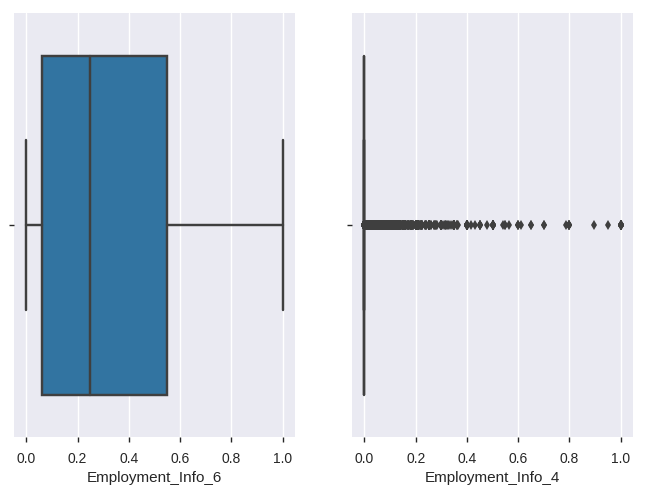

In [40]:
# checking the features with null for outliers\
plt.figure(1)
plt.subplot(121)
sns.boxplot(df_train.Employment_Info_6)
plt.subplot(122)
sns.boxplot(df_train.Employment_Info_4)

In [41]:
#since Employment_Info_6 has no outliers we can use the mean to fill the missing values
df_train['Employment_Info_6'].fillna(df_train['Employment_Info_6'].mean(),inplace=True)
df_test['Employment_Info_6'].fillna(df_test['Employment_Info_6'].mean(),inplace=True)

In [42]:
df_train['Employment_Info_4'].fillna(df_train['Employment_Info_4'].median(),inplace=True)
df_test['Employment_Info_4'].fillna(df_test['Employment_Info_4'].median(),inplace=True)

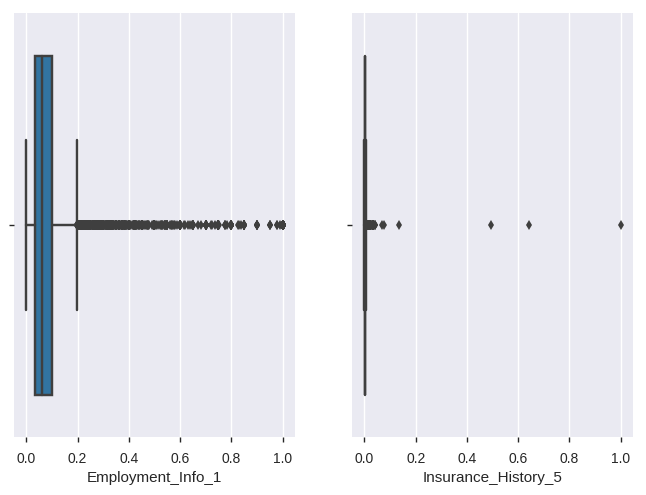

In [43]:
plt.figure(2)
plt.subplot(121)
sns.boxplot(df_train.Employment_Info_1)
plt.subplot(122)
sns.boxplot(df_train.Insurance_History_5)

In [44]:
df_train['Employment_Info_1'].fillna(df_train['Employment_Info_1'].median(),inplace=True) 
# imputing with Meadian , as there are lots of Outliers 
df_test['Employment_Info_1'].fillna(df_test['Employment_Info_1'].median(),inplace=True) 


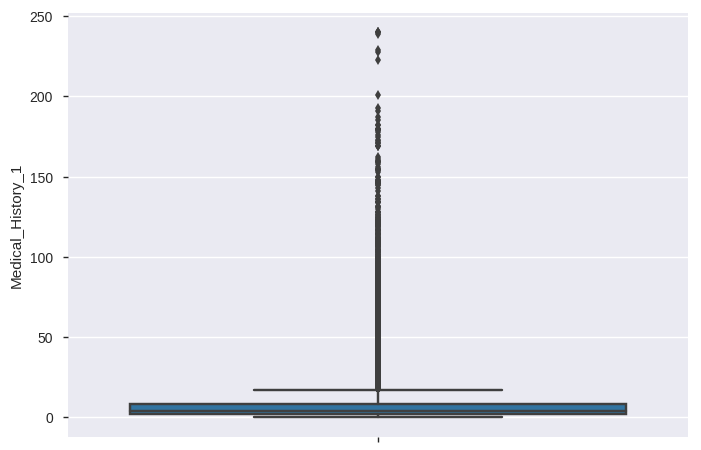

In [45]:
sns.boxplot(y=df_train['Medical_History_1'])

In [46]:
df_train['Medical_History_1'].fillna(df_train['Medical_History_1'].median(),inplace=True)
df_test['Medical_History_1'].fillna(df_test['Medical_History_1'].median(),inplace=True)

In [47]:
#imputing with median 
df_train['Insurance_History_5'].fillna(df_train['Insurance_History_5'].median(),inplace=True)
df_test['Insurance_History_5'].fillna(df_test['Insurance_History_5'].median(),inplace=True)


# Dropping the features with high missing value

In [48]:
df_train.isnull().sum()

Id                     0
Product_Info_1         0
Product_Info_2         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_5    0
                      ..
Medical_Keyword_20     0
Medical_Keyword_21     0
Medical_Keyword_22     0
Medical_Keyword_23     0
Medical_Keyword_24     0
Medical_Keyword_25     0
Medical_Keyword_26     0
Medical_Keyword_27     0
Medical_Keyword_28     0


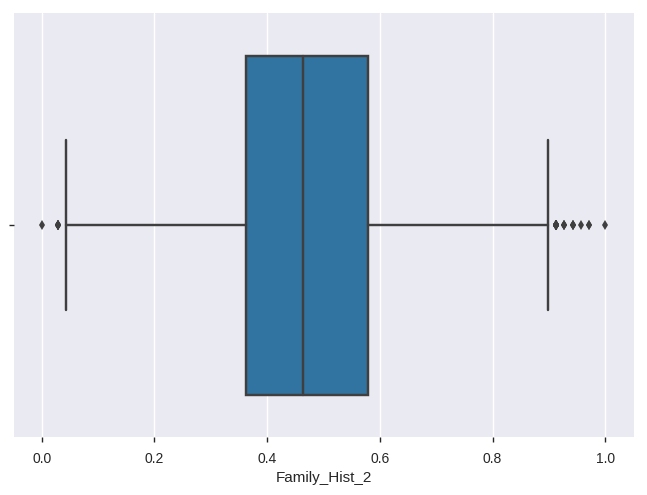

In [49]:
sns.boxplot(df_train.Family_Hist_2)

In [50]:
df_train['Family_Hist_2'].fillna(df_train['Family_Hist_2'].median(),inplace=True)
df_test['Family_Hist_2'].fillna(df_test['Family_Hist_2'].median(),inplace=True)


In [52]:
profile = pf.ProfileReport(df_train)


In [53]:
profile.to_file(outputfile="output.html")

# Feature Engineering
* dropping some redundant feature
* handling sparse classs
* dropping features that are highly correlated

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

In [62]:
df_train.dtypes

Product_Info_1           int64
Product_Info_2          object
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
Insurance_History_8      int64
Family_Hist_1            int64
Family_Hist_2          float64
                        ...   
Medical_Keyword_20       int64
Medical_

In [64]:
#dropping features that are correlated.
df_train.drop(['Insurance_History_7', 'Insurance_History_9', 'Medical_History_36'],axis = 1, inplace=True)

KeyError: "['Insurance_History_7' 'Insurance_History_9' 'Medical_History_36'] not found in axis"

In [65]:
df_test.drop(['Insurance_History_7', 'Insurance_History_9', 'Medical_History_36'],axis = 1, inplace=True)

KeyError: "['Insurance_History_7' 'Insurance_History_9' 'Medical_History_36'] not found in axis"

In [66]:
df_train.drop(['Id','Ht','Wt'],axis=1, inplace=True)

KeyError: "['Id' 'Ht' 'Wt'] not found in axis"

In [67]:
df_train.columns

Index(['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'BMI',
       'Employment_Info_1',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=115)

Changing the categorical features to Numeric data using Label encoder

In [68]:
df_train.Product_Info_2.unique()

array(['D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3',
       'A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1'], dtype=object)

In [69]:
abt = pd.get_dummies(df_train,columns=['Product_Info_2'])
abt_test = pd.get_dummies(df_test, columns=['Product_Info_2'])

In [70]:
print(len(abt.columns))

133


In [72]:
print(len(abt_test.columns))

135


In [73]:
abt.head(10)

Product_Info_1  Product_Info_3  Product_Info_4  Product_Info_5  \
0               1              10        0.076923               2   
1               1              26        0.076923               2   
2               1              26        0.076923               2   
3               1              10        0.487179               2   
4               1              26        0.230769               2   
5               1              26        0.230769               3   
6               1              10        0.166194               2   
7               1              26        0.076923               2   
8               1              26        0.230769               2   
9               1              21        0.076923               2   

   Product_Info_6  Product_Info_7   Ins_Age       BMI  Employment_Info_1  \
0               1               1  0.641791  0.323008              0.028   
1               3               1  0.059701  0.272288              0.000   
2               3               1  0.029851  0.428780              0.030   
3               3               1  0.164179  0.352438              0.042   
4               3               1  0.417910  0.424046              0.027   
5               1               1  0.507463  0.364887              0.325   
6               3               1  0.373134  0.376587              0.110   
7               3               1  0.611940  0.571612              0.120   
8               3               1  0.522388  0.362643              0.165   
9               3               1  0.552239  0.587796              0.025   

   Employment_Info_2  ...  Product_Info_2_B2  Product_Info_2_C1  \
0                 12  ...                  0                  0   
1                  1  ...                  0                  0   
2                  9  ...                  0                  0   
3                  9  ...                  0                  0   
4                  9  ...                  0                  0   
5                 15  ...                  0                  0   
6                  1  ...                  0                  0   
7                 12  ...                  0                  0   
8                  9  ...                  0                  0   
9                  1  ...                  0                  0   

   Product_Info_2_C2  Product_Info_2_C3  Product_Info_2_C4  Product_Info_2_D1  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   
5                  0                  0                  0                  0   
6                  0                  0                  0                  0   
7                  0                  0                  0                  0   
8                  0                  0                  0                  0   
9                  0                  0                  0                  0   

   Product_Info_2_D2  Product_Info_2_D3  Product_Info_2_D4  Product_Info_2_E1  
0                  0                  1                  0                  0  
1                  0                  0                  0                  0  
2                  0                  0                  0                  1  
3                  0                  0                  1                  0  
4                  1                  0                  0                  0  
5                  1                  0                  0                  0  
6                  0                  0                  0                  0  
7                  1                  0                  0                  0  
8                  0                  1                 

In [74]:
abt.to_csv('analytical_base_table.csv', index=None)

In [76]:
abt_test.to_csv('analytical_base_table_test.csv', index=None)